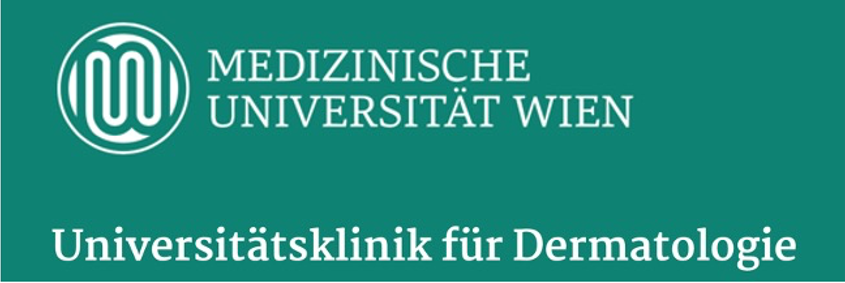

# <p style="text-align: center;"> Introduction to single cell analysis <br> (OEGDV 2025) </p>

## 1. About the compute infrasturcture:

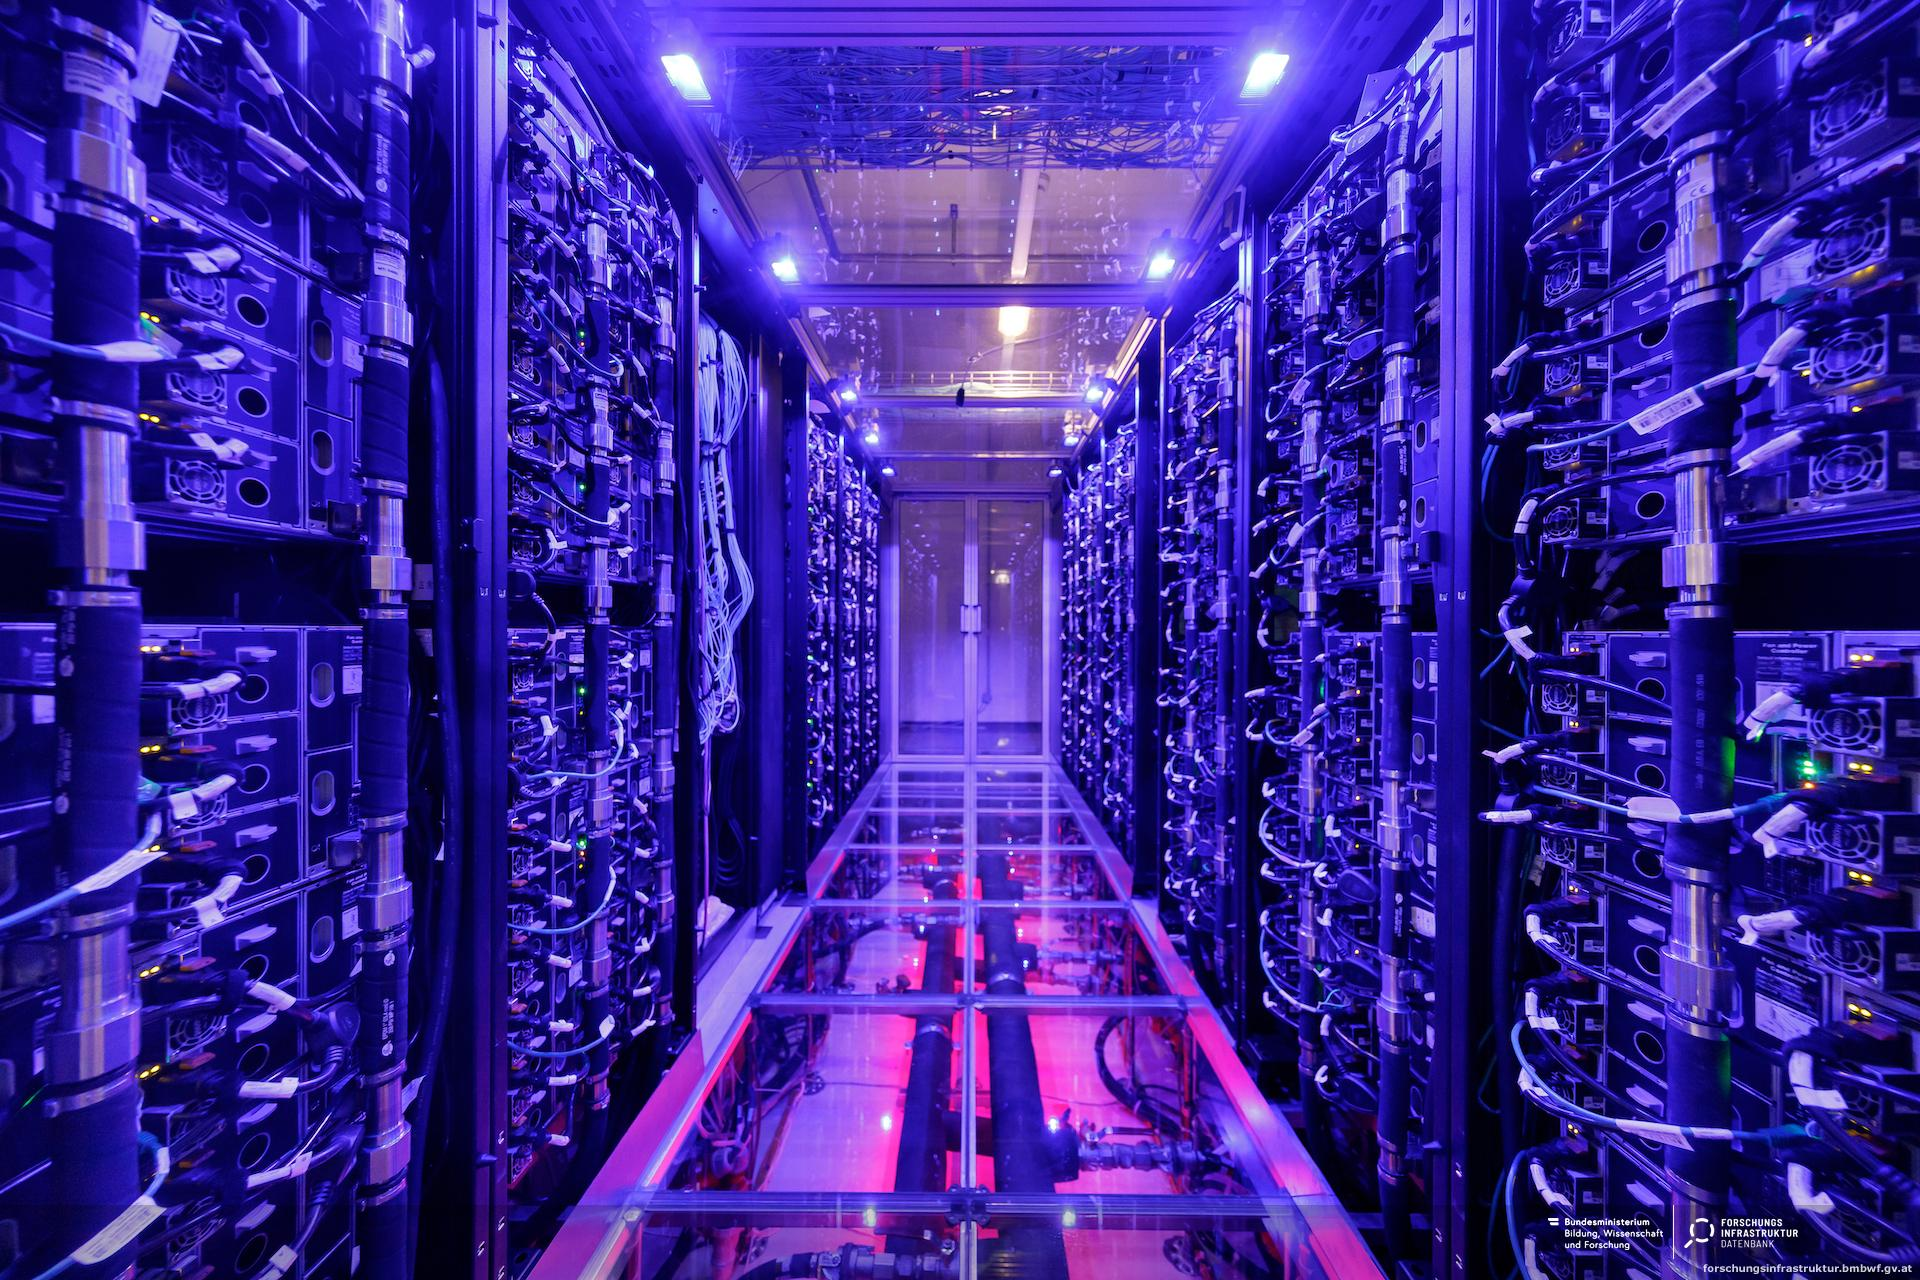

__Our environment is provided by the supercomputer at TU Vienna__.   
>* This is called a HPC (High-Performance Computing")  
>* VSC4:  
>>* 700 standard nodes; cores: 24-48; memory: 96 GB   
>>* 78 fat nodes; cores: 24-48; memory: 384 GB  
>>* 12 very fat nodes; cores: 24-48; memory: 768 GB  
>* VSC5:  
>>* 710 standard nodes: cores: 74; memory: 256GB  
>>* 120 fat and very fat nodes; memory: 1TB; 2TB. 
>>* 60 GPU nodes  

More detailed info about the nodes can be found [here](https://vsc.ac.at//fileadmin/user_upload/vsc/download/brochure/VSC-folder-2023.pdf)


<div style="position: absolute; top: 0px; right: 10px;">
    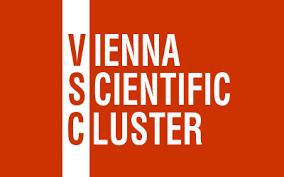
</div>

__Most Austrian Universities are collaboating with the VSC__.  
>>* [Partner Universities](https://vsc.ac.at//access/)  
>>* [project application guidlines](https://vsc.ac.at//access/project-application/)   
>>* [documentation](https://docs.vsc.ac.at)
<br>

#### Jupyter notebooks are also available via GitHub: [here](https://github.com/Mwielscher/OEGDV_scRNAseq/tree/main)

## 2. About the Jupyterhub environment:

In [ ]:
getwd()

### This is the location of your directory on VSC. 
>* /gpfs/data/fs70824/__traineeXY__/SCA/  
>* you can create folders here.   
>* you can create your own notebook here.  
>* you can upload and download files here.  
>* it will stay available to you until Monday. 

## 3. R-basics:

### Let's check our environment:

In [ ]:
sessionInfo()

In [ ]:
library(Seurat)

In [ ]:
sessionInfo()

### There are 5 basic types of data objects in R:
>* __vectors__  combines elements of the same type
>* __factors__ usually based on a vector, however with repeating entries e.g. case/control
>* __data frames__  like an excel sheet
>* __matrix__ like an excel sheet with __only numbers__ in it 
>* __lists__ can contain many different data types (eg. a vector and a matrix) 
  
__<p style="text-align: center;"> !! data frames and matices have to be rectangular !! </p>__

## Vectors:

In [ ]:
a=c(1,2,3,4,5)  ## numeric vector  ## c means concatenate
class(a)   ## returns the type of data in our vector
a

In [ ]:
foo=c("aa","bb","cc","te","aa","te","aa")     ## character Vector
class(foo)
print(foo)                     lpo         ## works with or without print command irrespective of data type              

In [ ]:
test=c(TRUE,TRUE,FALSE)     ## Boolean Vectors 
class(test)
test

In [ ]:
q=c(1,2,"tt",TRUE)  ### if we mix input data types we will get a character vector by default
class(q)
q

### Basic commands for Vectors:

In [ ]:
ls()    ### gives us an overview of all objects in our environment

In [ ]:
length(foo)

In [ ]:
foo[3]   ## returns 3rd element of vector

In [ ]:
foo[2:5]  ## returns 2nd to 5th element of vector

In [ ]:
foo[5:length(foo)]  ## we can use commands to subset our vector ## this will give us the 5th upto the last element 

### overview of types of data in R:
your input data will be interpreted as on of the following data types:

Data Type	| example
------------|--------:
__logical:__ | TRUE, FALSE
__numeric:__	| 103, 2.34, 7.89
__integer:__	| 1, 2, 501
__character:__ |	"tt", "TRUE", "34"

## Factors:
> A factor adds lables to your vector.   
> Used for categorical data such as case / control, plate1 /plate2 /plate3  
> They are important for statistics and plotting (e.g. to determine the color: blue / yellow /grey)

In [ ]:
outcome=c("case","contr","contr","contr","case","case","contr","contr")  ## make a character vector
outcome

In [ ]:
outcome=as.factor(outcome)   ## factor and as.factor provides the same result
class(outcome)
outcome
nlevels(outcome)

## Data frames: 
  
  example: raw read counts of RNAseq experiment
  
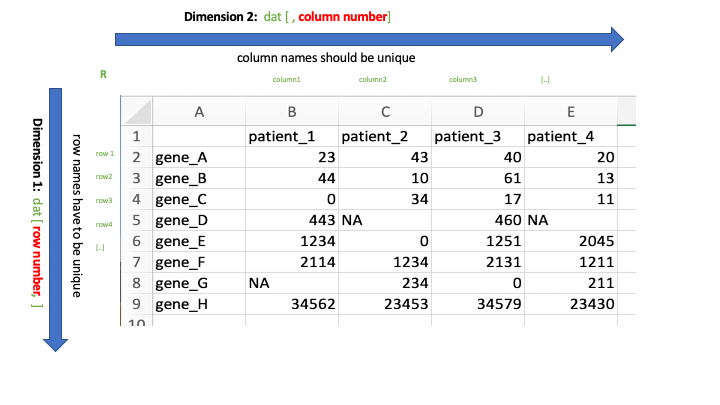

 A data frame is a two dimensional data structure:  
>* Each column contains one value per row. In our example one value per gene for a certain patient.  
>* Each row contains one value per column. In our example one value per patient for a certain gene.

### Import and navigate data frames

In [ ]:
dat=read.table("example_geneList.txt",header=T)

In [ ]:
dim(dat)   ## get dimensions of imported table

In [ ]:
str(dat)  ## get over view of imported data

In [ ]:
head(dat)

### what do this abbreviations mean
>* __int__ is integer (whole number) 
>* __fct__ is factor (see above). 
>* __dbl__ is decimal number (double precision floating point numbers)  

This might look a little different when using R-studio
   

In [ ]:
colnames(dat)   ## gives you the column names

In [ ]:
head(rownames(dat)) ## gives you the first 6 rownames

### extract a row from our dataframe

In [ ]:
dat[2,]    ## gives you the 2nd row 
dat[1204,]

### extract a column from our dataframe

In [ ]:
head(dat[,4])             ### returns first 6 values of column 4
head(dat[,"logFC"])

In [ ]:
head(dat[,c("logFC","adj.P.Val")])   ### returns first 6 values of column 4 and column 8

## order and filter the data:  
>* "order" command in R orders from smallest to largest value

In [ ]:
dat=dat[order(dat$adj.P.Val),]  ## order by P value of first data set
head(dat)

__Now we sort first on the column (adj.P.Val) first then on the second column (logFC_first)__

In [ ]:
dat_sorted=dat[order(dat$adj.P.Val,-dat$logFC),] 
## negative sign orders from largest to smallest value
head(dat_sorted)   

__Now we filter on the column (adj.P.Val) first then on the second column (logFC)__

In [ ]:
dim(dat)
dat_filter1=dat[dat$adj.P.Val < 1e-06 & abs(dat$logFC) > 1,]  
#abs gives the absolute value of a numerical value
dim(dat_filter1)

### filtering data using regular expressions:

>### Basic Regex matching:
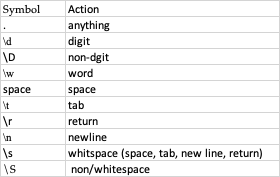

>### Bounderies and quantifiers:
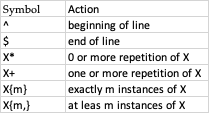

>### filtering data using regular expressions:
>* grepl creates a boolean vector 
>* we can use regular expression within the quotes. 
>* regular expression are used for pattern matching and are very similar across programming languages

In [ ]:
genes=as.character(dat$SYMBOL) 
test1=grepl("Slc",genes)   
head(test1)
length(test1)
table(test1)

In [ ]:
length(genes[grepl("^Slc",genes)]) ## now our expression has to start with SLC 
length(genes[grepl("Slc",genes)])

In [ ]:
genes[grepl("^Slc2.*3.*",genes)]  ## genes starting with Scl2 then anything then 3

In [ ]:
genes[grepl("^Slc2.*3$",genes)] ## genes starting with SCL2 then anything and then end with 3 

### combine 2 conditions:

In [ ]:
## combine 2 conditions: for example all significant Slc transporter
comb_filter3=dat[grepl("Slc",as.character(dat$SYMBOL)) & dat$adj.P.Val< 1e-06 , ]
dim(comb_filter3)
head(comb_filter3)

### Combine files: merge()

In [ ]:
second=read.table("geneList_2.txt",sep="\t",header=T)

### inner join:  
if key values are present in both files the entries are kept:  
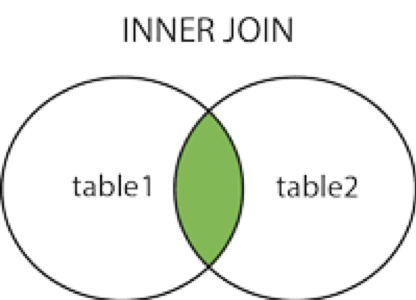


In [ ]:
combined=merge(dat,second,by.x="ENTREZID",by.y="ENTREZID_exp2")
dim(dat)
dim(second)
dim(combined)

## full outer join":  
every entry is kept:  
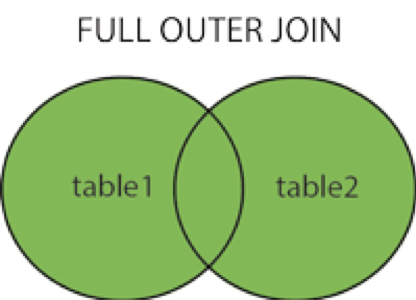

In [ ]:
combined=merge(dat,second,by.x="ENTREZID",by.y="ENTREZID_exp2", all.x=TRUE, all.y=TRUE)
dim(combined)

## left join:  
only if key values are present in left file first the entries are kept:  
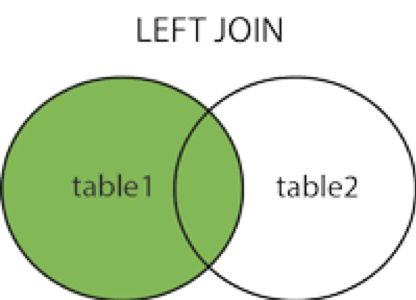

In [ ]:
combined=merge(dat,second,by.x="ENTREZID",by.y="ENTREZID_exp2", all.x=TRUE)
dim(combined)

## Different Data formats:  
>* R formats: RDS, RData   -- these are R specfic formats -binary very memory efficient
>* H5 or HDF5             -- these are also a binary formats, however compatible across programming languages
>* .mtx  -- this are sparse matrices often used in single cell RNAseq
>* .tsv  -- this are standard tab delimited files  
>* we will use this GEO dataset: [GSE162075](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162075)

### import cellranger output

In [ ]:
library(Matrix)
barcodes=read.table("GSM4932697_Unif_mom_CD45_pos_barcodes.tsv",sep="\t")
genes.gsm = read.table("GSM4932697_Unif_mom_CD45_pos_features.tsv",sep="\t")
counts.gsm=readMM("GSM4932697_Unif_mom_CD45_pos_filtered_matrix.mtx") 

In [ ]:
dim(barcodes)             ## length of barcodes and column names does not match !!
dim(genes.gsm)
dim(counts.gsm)
head(barcodes)
head(genes.gsm)

In [ ]:
counts.gsm[1:6,1:6]

In [ ]:
## let's annotate our sparse matrix
counts.gsm@Dimnames[[1]]=as.character(genes.gsm$V1)  ## sparce matrixes are S4 objects
counts.gsm@Dimnames[[2]]=as.character(barcodes$V1)
counts.gsm[1:6,1:6]

#### this vanilla Seurat command converts the sparse Matrix to a Seurat object:  
>* it will exclude all genes(features) which are expressed in less than 15 cells. 
>* it will also exclude all cells with less than 400 genes (features) expressed 
 
__in my opinion this is the least stringent you can go about this: all these machine-learning algorithms implemented in Seurat need data - ideally a lot__

In [ ]:
library(Seurat)
Inf_mom_CD45 = CreateSeuratObject(counts = counts.gsm,min.cells = 15, min.features = 400)

In [ ]:
str(Inf_mom_CD45)

In [ ]:
save(Inf_mom_CD45,file="single_cell_data_example.RData")